# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kidney_disease.csv to kidney_disease.csv


# Reading the dataset using Pandas

In [3]:
df = pd.read_csv('kidney_disease.csv')

In [4]:
df.shape

(400, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
df.head().T

,0,1,2,3,4
id,0,1,2,3,4
age,48.0,7.0,62.0,48.0,51.0
bp,80.0,50.0,80.0,70.0,80.0
sg,1.02,1.02,1.01,1.005,1.01
al,1.0,4.0,2.0,4.0,2.0
su,0.0,0.0,3.0,0.0,0.0
rbc,NaN,NaN,normal,normal,normal
pc,normal,normal,normal,abnormal,normal
pcc,notpresent,notpresent,notpresent,present,notpresent
ba,notpresent,notpresent,notpresent,notpresent,notpresent


In [7]:
!pip install impyute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
column_names={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"haemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

df.rename(columns=column_names, inplace=True)

In [9]:
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')

In [10]:
df.drop(["id"],axis=1,inplace=True)

# Checking for the NaN, Nan, nan, Null values

In [11]:
df.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64

# Missing values Visualization

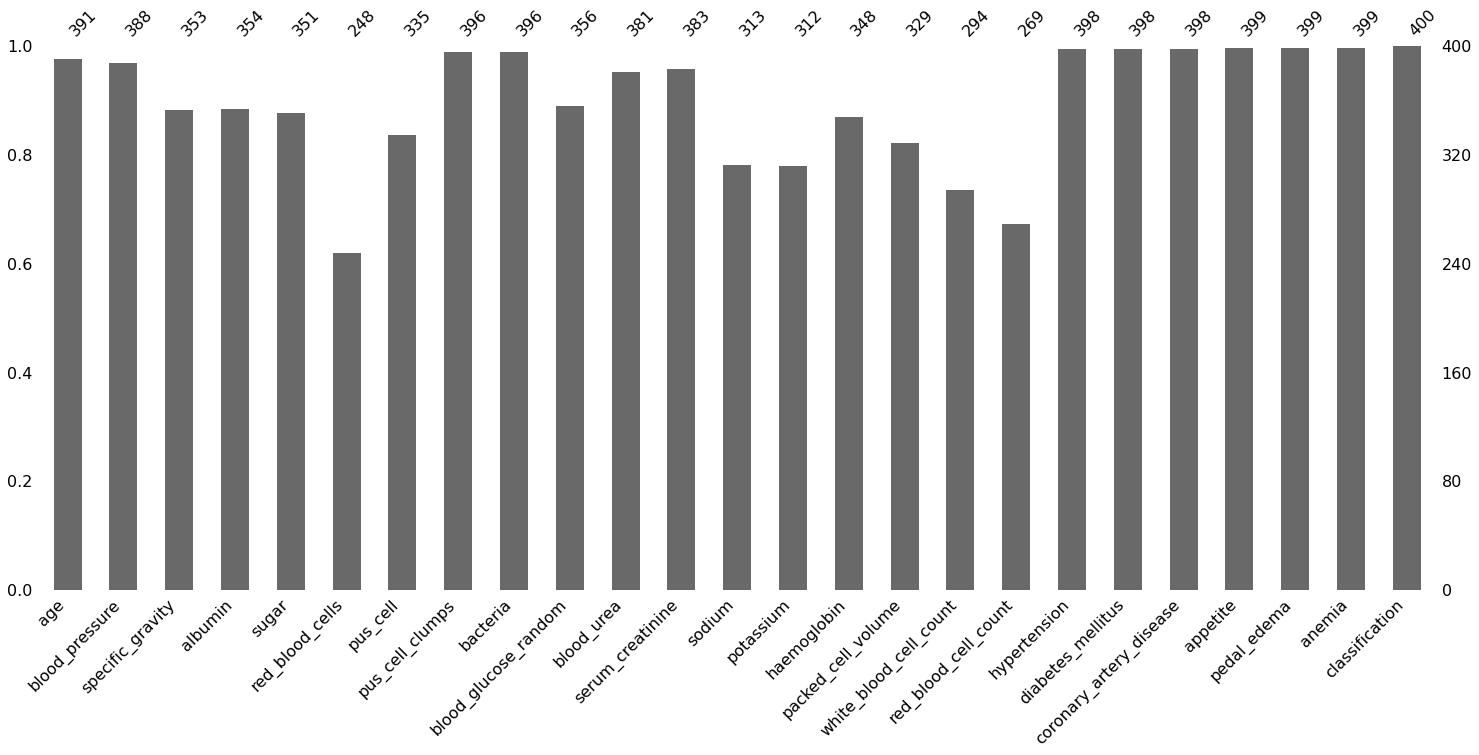

In [12]:
import missingno as msno
msno.bar(df)

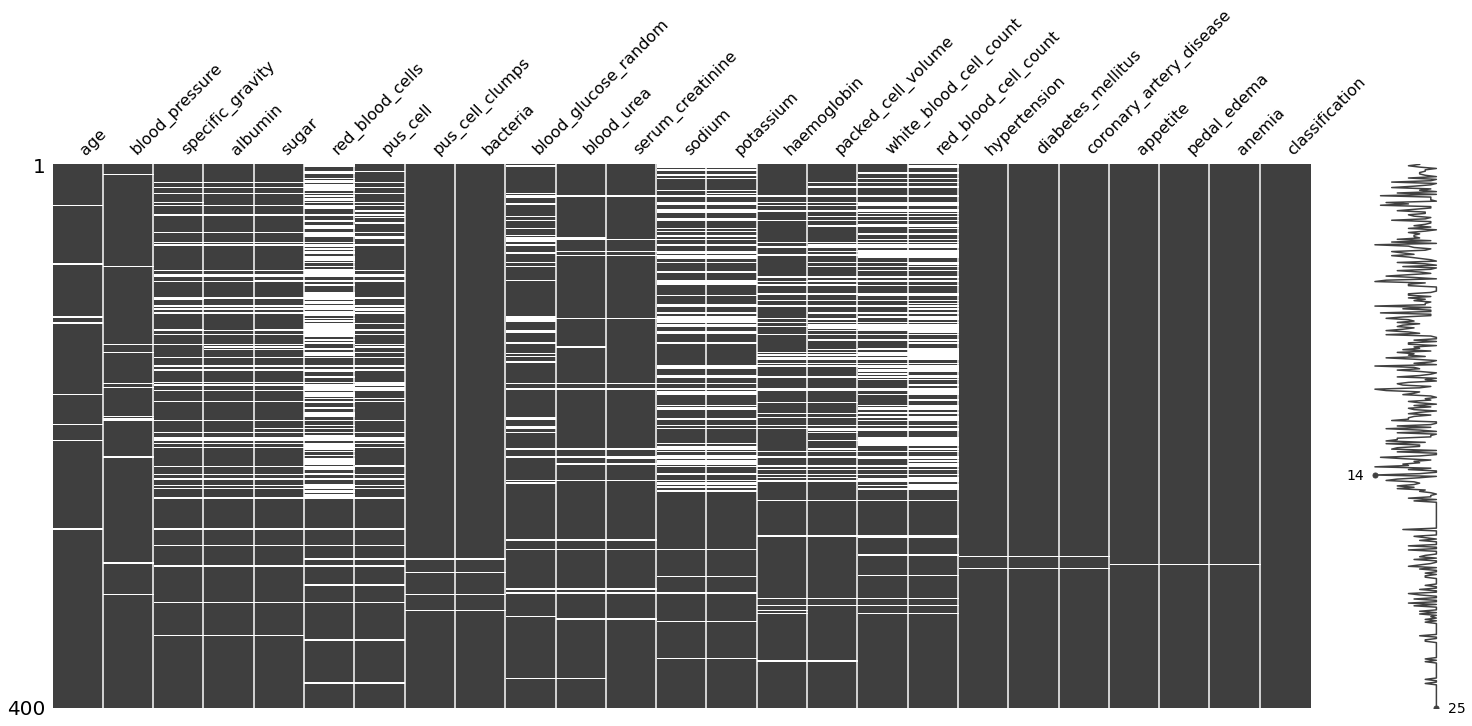

In [13]:
msno.matrix(df)

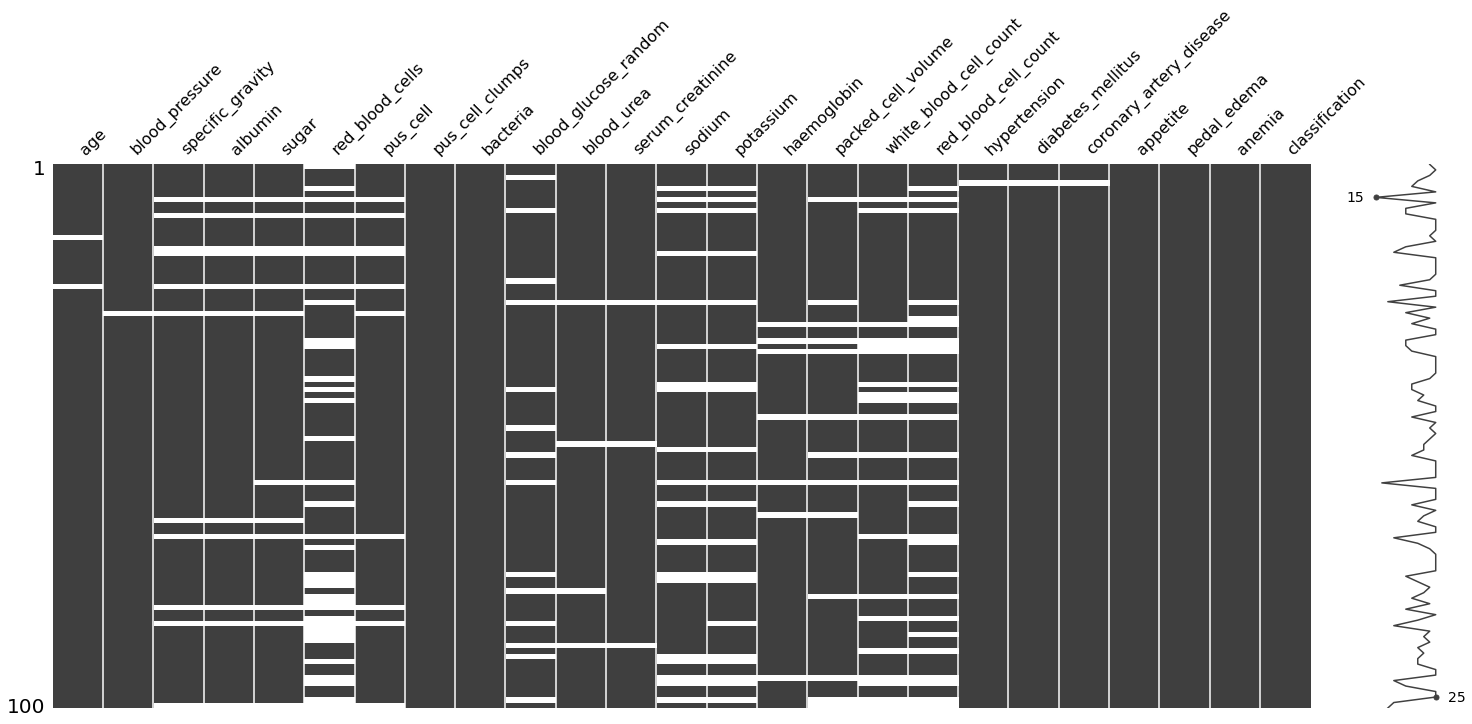

In [14]:
msno.matrix(df.sample(100))

# Missing Values Correlation check


there can be 3 reasons for missing values. MCAR, MAR, NMAR

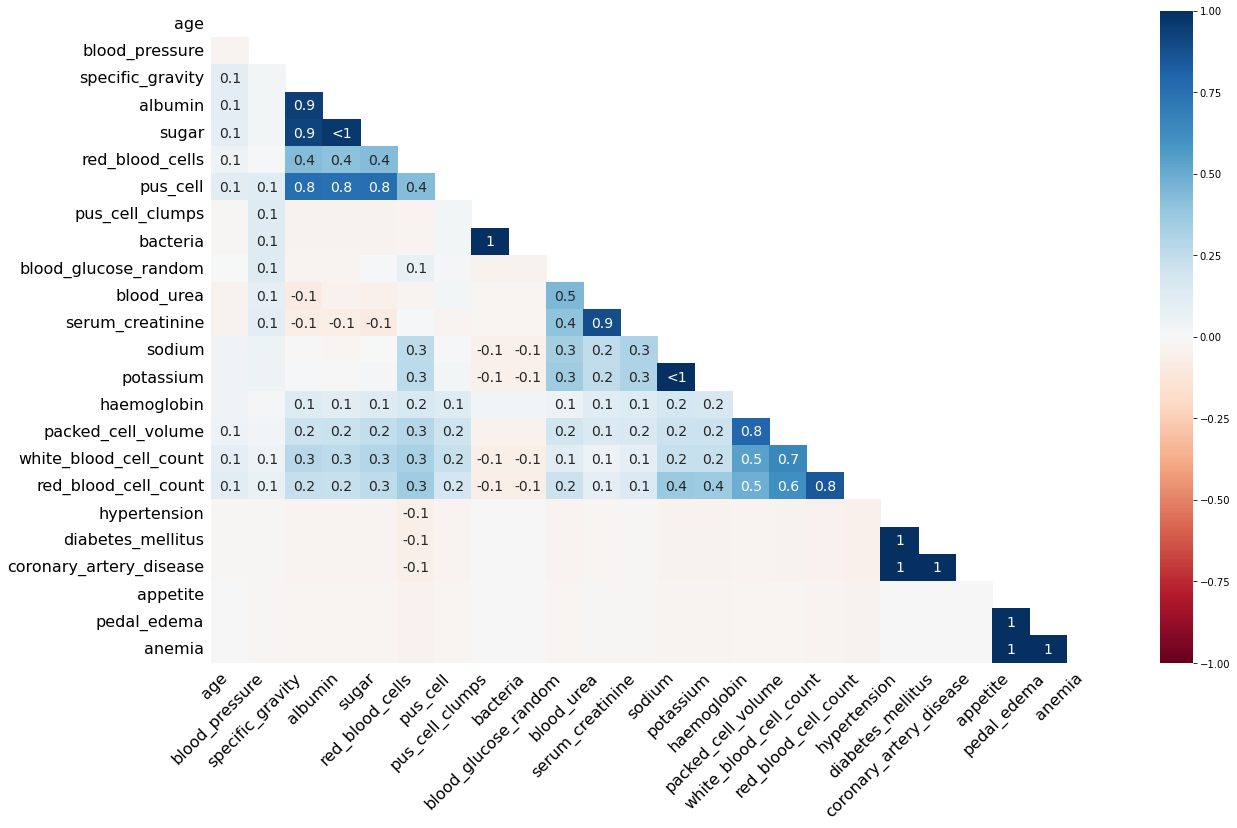

In [15]:
msno.heatmap(df) 

Low correlation means the data is missing at random(MAR)

In [ ]:
numerical_features = []
categorical_features = []

for i in df.drop('classification', axis=1).columns:
    if df[i].nunique()>7:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

In [ ]:
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'})
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')
df['classification'] = df['classification'].replace(to_replace = 'ckd\t', value = 'ckd')

In [ ]:
df.loc[:,categorical_features].isnull().sum().sort_values(ascending=False)

red_blood_cells            152
pus_cell                    65
sugar                       49
specific_gravity            47
albumin                     46
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
dtype: int64

# Encoding categorical features

In [ ]:
to_encode = [feat for feat in categorical_features if df[feat].dtype=='object']
to_encode

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'pedal_edema',
 'anemia']

# Using OrdinalEncoder to transform categorical values

In [ ]:
ode = OrdinalEncoder(dtype = int)

In [ ]:
def encode(data):
    '''function to encode non-nan data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = ode.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in to_encode:
    encode(df[columns])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [ ]:
df.loc[:, categorical_features].head(10)

,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia
0,1.020,1.0,0.0,NaN,1,0,0,1,1,0,0,0,0
1,1.020,4.0,0.0,NaN,1,0,0,0,0,0,0,0,0
2,1.010,2.0,3.0,1,1,0,0,0,1,0,1,0,1
3,1.005,4.0,0.0,1,0,1,0,1,0,0,1,1,1
4,1.010,2.0,0.0,1,1,0,0,0,0,0,0,0,0
5,1.015,3.0,0.0,NaN,NaN,0,0,1,1,0,0,1,0
6,1.010,0.0,0.0,NaN,1,0,0,0,0,0,0,0,0
7,1.015,2.0,4.0,1,0,0,0,0,1,0,0,1,0
8,1.015,3.0,0.0,1,0,1,0,1,1,0,0,0,1
9,1.020,2.0,0.0,0,0,1,0,1,1,0,1,0,1


In [ ]:
X = df.drop('classification', axis=1)

In [ ]:
X_train = X.loc[:300,]
X_test = X.loc[300:,]

# Imputing numerical features using MICE

In [ ]:
#from fancyimpute import IterativeImputer as MICE
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer as MICE
from impyute.imputation.cs import mice

In [ ]:
# MICE requires float values
X_train_numerical = X_train.loc[:,numerical_features].astype('float64')
X_train_numerical_imputed = mice(X_train_numerical.values)
X_train.loc[:,numerical_features].isna().sum().sort_values(ascending=False)


red_blood_cell_count      127
white_blood_cell_count    102
potassium                  84
sodium                     83
packed_cell_volume         68
haemoglobin                47
blood_glucose_random       40
blood_urea                 15
serum_creatinine           14
blood_pressure             11
age                         9
dtype: int64

In [ ]:
X_train.loc[:,numerical_features] = X_train_numerical_imputed

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [ ]:
X_train.loc[:,numerical_features].isna().sum().sort_values(ascending=False)

age                       0
blood_pressure            0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

# Imputing Categorical features

In [ ]:
!pip install fancyimpute  
from fancyimpute import KNN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 20.6 MB/s 
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=6be439606dc5a193230e8dfa2bf2280f60fd2a57f115c21fecda77a41a76e312
  Stored in directory: /root/.cache/pip/wheels/e3/04/06/a1a7d89ef4e631ce6268ea2d8cde04f7290651c1ff1025ce68
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=aabad8b8681f7bf0af59189e33c00e9b22ca6ea68cbfbf60a416eed5d93c2e4f
  Stored in directory: /root/.cache/pip/wheels/72/21/a8/a045cacd9838abd5643f6bfa852c0796a99d6b1494760494e0
Successfully built fancyimpute knnimpute


In [ ]:
KNN_imputer = KNN()

In [ ]:
X_train_imputed = pd.DataFrame(np.round(KNN_imputer.fit_transform(X_train)),columns = X_train.columns)

Imputing row 1/301 with 1 missing, elapsed time: 0.031
Imputing row 101/301 with 0 missing, elapsed time: 0.033
Imputing row 201/301 with 1 missing, elapsed time: 0.037
Imputing row 301/301 with 2 missing, elapsed time: 0.042


In [ ]:
X_train_imputed.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
dtype: int64

# Scaling Data

In [ ]:
X_train_imputed.describe().T

,count,mean,std,min,25%,50%,75%,max
age,301.0,52.837209,16.982052,2.0,45.0,55.0,65.0,90.0
blood_pressure,301.0,78.568106,14.165669,50.0,70.0,80.0,90.0,180.0
specific_gravity,301.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
albumin,301.0,1.372093,1.327059,0.0,0.0,1.0,2.0,5.0
sugar,301.0,0.591362,1.212075,0.0,0.0,0.0,0.0,5.0
red_blood_cells,301.0,0.737542,0.440703,0.0,0.0,1.0,1.0,1.0
pus_cell,301.0,0.710963,0.454070,0.0,0.0,1.0,1.0,1.0
pus_cell_clumps,301.0,0.139535,0.347081,0.0,0.0,0.0,0.0,1.0
bacteria,301.0,0.073090,0.260717,0.0,0.0,0.0,0.0,1.0
blood_glucose_random,301.0,162.093023,82.585580,22.0,106.0,133.0,193.0,490.0


In [ ]:
X_train_imputed.describe().T

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train_imputed)
X_train_scaled = scaler.transform(X_train_imputed)

In [ ]:
X_train_scaled = pd.DataFrame(data=X_train_scaled, columns = X_train.columns)
X_train_scaled.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia
count,301.000000,301.000000,301.0,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,...,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,0.577696,0.219755,0.0,0.274419,0.118272,0.737542,0.710963,0.139535,0.073090,0.299344,...,0.607736,0.597554,0.274954,0.369878,0.495017,0.458472,0.112957,0.272425,0.252492,0.199336
std,0.192978,0.108967,0.0,0.265412,0.242415,0.440703,0.454070,0.347081,0.260717,0.176465,...,0.176667,0.177517,0.112109,0.151391,0.500808,0.499102,0.317067,0.445949,0.435165,0.400166
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.488636,0.153846,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.179487,...,0.500000,0.477273,0.216753,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.602273,0.230769,0.0,0.200000,0.000000,1.000000,1.000000,0.000000,0.000000,0.237179,...,0.642857,0.613636,0.277723,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.715909,0.307692,0.0,0.400000,0.000000,1.000000,1.000000,0.000000,0.000000,0.365385,...,0.714286,0.704545,0.307445,0.500000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Test Data

In [ ]:
X_test_numerical = X_test.loc[:,numerical_features].astype('float64')

In [ ]:
X_test_numerical_imputed = mice(X_test_numerical.values)
X_test.loc[:,numerical_features] = X_test_numerical_imputed

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [ ]:
X_test_imputed = pd.DataFrame(np.round(KNN_imputer.fit_transform(X_test)),columns = X_test.columns)

Imputing row 1/100 with 2 missing, elapsed time: 0.007


In [ ]:
scaler.fit(X_test_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [ ]:
X_test_scaled = pd.DataFrame(data=X_test_scaled, columns = X_test.columns)


In [ ]:
X_test_scaled

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia
0,0.485294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.628571,...,0.4,0.214286,0.731343,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.470588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.371429,...,0.8,0.071429,0.432836,0.5,0.0,0.0,0.0,0.0,0.0,0.0
2,0.250000,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.814286,...,0.4,0.571429,0.517910,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.632353,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.528571,...,0.8,0.714286,0.358209,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.308824,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.828571,...,0.0,0.357143,0.283582,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.632353,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,...,0.6,0.500000,0.358209,0.5,0.0,0.0,0.0,0.0,0.0,0.0
96,0.441176,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,...,0.6,1.000000,0.522388,1.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.428571,...,0.6,0.642857,0.343284,0.5,0.0,0.0,0.0,0.0,0.0,0.0
98,0.073529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.628571,...,0.2,0.785714,0.432836,1.0,0.0,0.0,0.0,0.0,0.0,0.0
